#### Import Required libraries

In [33]:
from datetime import date
from dateutil.relativedelta import relativedelta
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
end_date = date(2023,6,5) #or date.today()
start_date = end_date - relativedelta(years=2)

#### Getting data from yfinance

In [27]:
dfSPY = yf.download("SPY", start=start_date, end=end_date).round(1)[['Adj Close']]
dfVIX = yf.download("^VIX", start=start_date, end=end_date).round(1)[['Adj Close']]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [28]:
dfSPY.columns=['SPY']
dfVIX.columns=['VIX']

In [29]:
df=dfSPY.join(dfVIX).dropna()
df.head()

,SPY,VIX
Date,,
2021-06-07,406.8,16.4
2021-06-08,406.9,17.1
2021-06-09,406.3,17.9
2021-06-10,408.2,16.1
2021-06-11,408.9,15.6


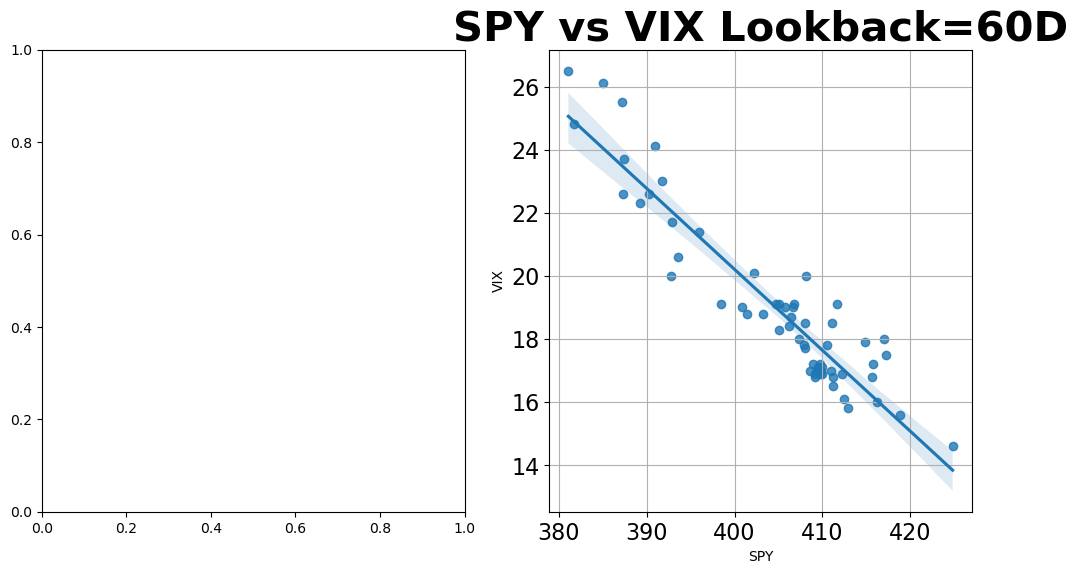

In [32]:
# Assuming myAx is defined somewhere before this code
# For example, you might have created a figure and axes using plt.subplots
fig, myAx = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Assuming df is defined somewhere before this code
nDays = 60
data = df.tail(nDays).copy()

# Now you can use myAx[1] as the axis
ax = myAx[1]
ax.grid(True)
sns.regplot(data=data, x='SPY', y='VIX', ax=ax)
ax.set_title(f"SPY vs VIX Lookback={nDays}D", fontsize=30, weight='bold')
ax.set_xlabel('SPY', fontsize=10)
ax.set_ylabel('VIX', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=16)

# Display the plot
plt.show()